In [70]:
import pandas as pd 
import numpy as np 
from collections import OrderedDict
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,learning_curve
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.cluster import KMeans
import xgboost

In [2]:
df = pd.read_excel("Capstone Project.xlsx")

In [3]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
df.shape

(1030, 9)

# PERFORMING CUSTOM SUMMARY

In [5]:
def custom_summary(df):
    
    result = []
    
    for col in df.columns:
        if df[col].dtype != "object":
            
            stats=OrderedDict({'Column_Name':col,
                              'Count':df[col].count(),
                              'Minimum': df[col].min(),
                              'Quartile_1': df[col].quantile(0.25),
                              'Mean': df[col].mean(),
                              'Quartile_2': df[col].quantile(0.50),
                              'Quartile_3': df[col].quantile(0.75),
                               'Maximum': df[col].max(),
                              'Standard_Deviation': df[col].std(),
                              'Variance': df[col].var(),
                              'Skewness': df[col].skew(),
                              'Kurtosis': df[col].kurt(),
                              'IQR':df[col].quantile(0.75)-df[col].quantile(0.25)})
            
            result.append(stats)
            
            if df[col].skew() <- 1:
                sk_label = 'Highly Negatively Skewed'
            elif -1 <= df[col].skew() < -0.5:
                sk_label = 'Moderately Negatively Skewed'
            elif -0.5 <= df [col].skew() < 0:
                sk_label='Fairly Negatively Skewed'
            elif 0 <= df[col].skew() < 0.5:
                sk_label='Fairly Positively Skewed'
            elif 0.5 <= df[col].skew() < 1 :
                sk_label= 'Moderately Positively Skewed'
            else:
                sk_label = 'Highly Positively Skewed'
                
            stats['Skewness_Comment'] = sk_label
                
            if df[col].kurt() <=- 1:
                kurt_label = 'Highly Platykurtic'
            elif -1 < df[col].kurt() <= 0.5:
                kurt_label = 'Moderately Platykurtic'
            elif -0.5 < df[col].kurt() <=0.5:
                kurt_label='Mesokurtic'
            elif 0.5 < df[col].kurt() <=1 :
                kurt_label = 'Moderately Leptokurtic'
            else:
                kurt_label='Highly Leptokurtic'
            
            stats['Kurtosis_Comment'] = kurt_label
                   
            
            
    result_df = pd.DataFrame(result)
    
    
    return result_df

In [6]:
custom_summary(df)

,Column_Name,Count,Minimum,Quartile_1,Mean,Quartile_2,Quartile_3,Maximum,Standard_Deviation,Variance,Skewness,Kurtosis,IQR,Skewness_Comment,Kurtosis_Comment
0,cement,1030,102.00,192.375,281.167864,272.900,350.000,540.0,104.506364,10921.580220,0.509481,-0.520652,157.625,Moderately Positively Skewed,Moderately Platykurtic
1,slag,1030,0.00,0.000,73.895825,22.000,142.950,359.4,86.279342,7444.124812,0.800717,-0.508175,142.950,Moderately Positively Skewed,Moderately Platykurtic
2,ash,1030,0.00,0.000,54.188350,0.000,118.300,200.1,63.997004,4095.616541,0.537354,-1.328746,118.300,Moderately Positively Skewed,Highly Platykurtic
3,water,1030,121.80,164.900,181.567282,185.000,192.000,247.0,21.354219,456.002651,0.074628,0.122082,27.100,Fairly Positively Skewed,Moderately Platykurtic
4,superplastic,1030,0.00,0.000,6.204660,6.400,10.200,32.2,5.973841,35.686781,0.907203,1.411269,10.200,Moderately Positively Skewed,Highly Leptokurtic
5,coarseagg,1030,801.00,932.000,972.918932,968.000,1029.400,1145.0,77.753954,6045.677357,-0.040220,-0.599016,97.400,Fairly Negatively Skewed,Moderately Platykurtic
6,fineagg,1030,594.00,730.950,773.580485,779.500,824.000,992.6,80.175980,6428.187792,-0.253010,-0.102177,93.050,Fairly Negatively Skewed,Moderately Platykurtic
7,age,1030,1.00,7.000,45.662136,28.000,56.000,365.0,63.169912,3990.437729,3.269177,12.168989,49.000,Highly Positively Skewed,Highly Leptokurtic
8,strength,1030,2.33,23.710,35.817961,34.445,46.135,82.6,16.705742,279.081814,0.416977,-0.313725,22.425,Fairly Positively Skewed,Moderately Platykurtic


# SOME KEY POINTERS.

In [7]:
##1.The data has a total of 1030 records.
##2.The data does not have any null values.
##3.The maximum age is 365 days that means the slab has to rest for 1 year maximum.
##4.Most of the columns are skewed which indicates that their are outliers in the datset.

# TREATING THE OUTLIERS IN THE DATA

In [8]:
def replace_outliers(df,column):
    col_data=df[column]
    
    q2=df[column].median()
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    lower_limit=q1-1.5*iqr
    
    outliers=df.loc[(col_data < lower_limit)|(col_data>upper_limit),column]
    print(f"Length of {column} outliers",len(outliers))
    
    df.loc[(col_data < lower_limit)|(col_data>upper_limit),column]=q2
    return df

# PLOTTING ODT(OUTLIER DETECTION PLOTS)

In [9]:
def odt_plots(df,column):
    f,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,15))
    
    #BOXPLOT
    sns.boxplot(df[column],ax=ax1)
    ax1.set_title(f"Boxplot of {column}")
    ax1.set_xlabel("Boxplot")
    ax1.set_ylabel("Values")
    
    #Histogram with Outliers
    sns.distplot(df[column],ax=ax2)
    ax2.set_title(f'Histogram with outliers of {column}')
    ax2.set_xlabel("Distribution")
    ax2.set_ylabel("Values")
    
    ##Histogram without outliers
    y=replace_outliers(df,column)
    
    sns.distplot(y[column],ax=ax3)
    ax3.set_title(f'Histogram without outliers of {column}')
    ax3.set_xlabel("Distribution")
    ax3.set_ylabel("Values")
    

Length of cement outliers 0
Length of slag outliers 2
Length of ash outliers 0
Length of water outliers 9
Length of superplastic outliers 10
Length of coarseagg outliers 0
Length of fineagg outliers 5
Length of age outliers 59
Length of strength outliers 4


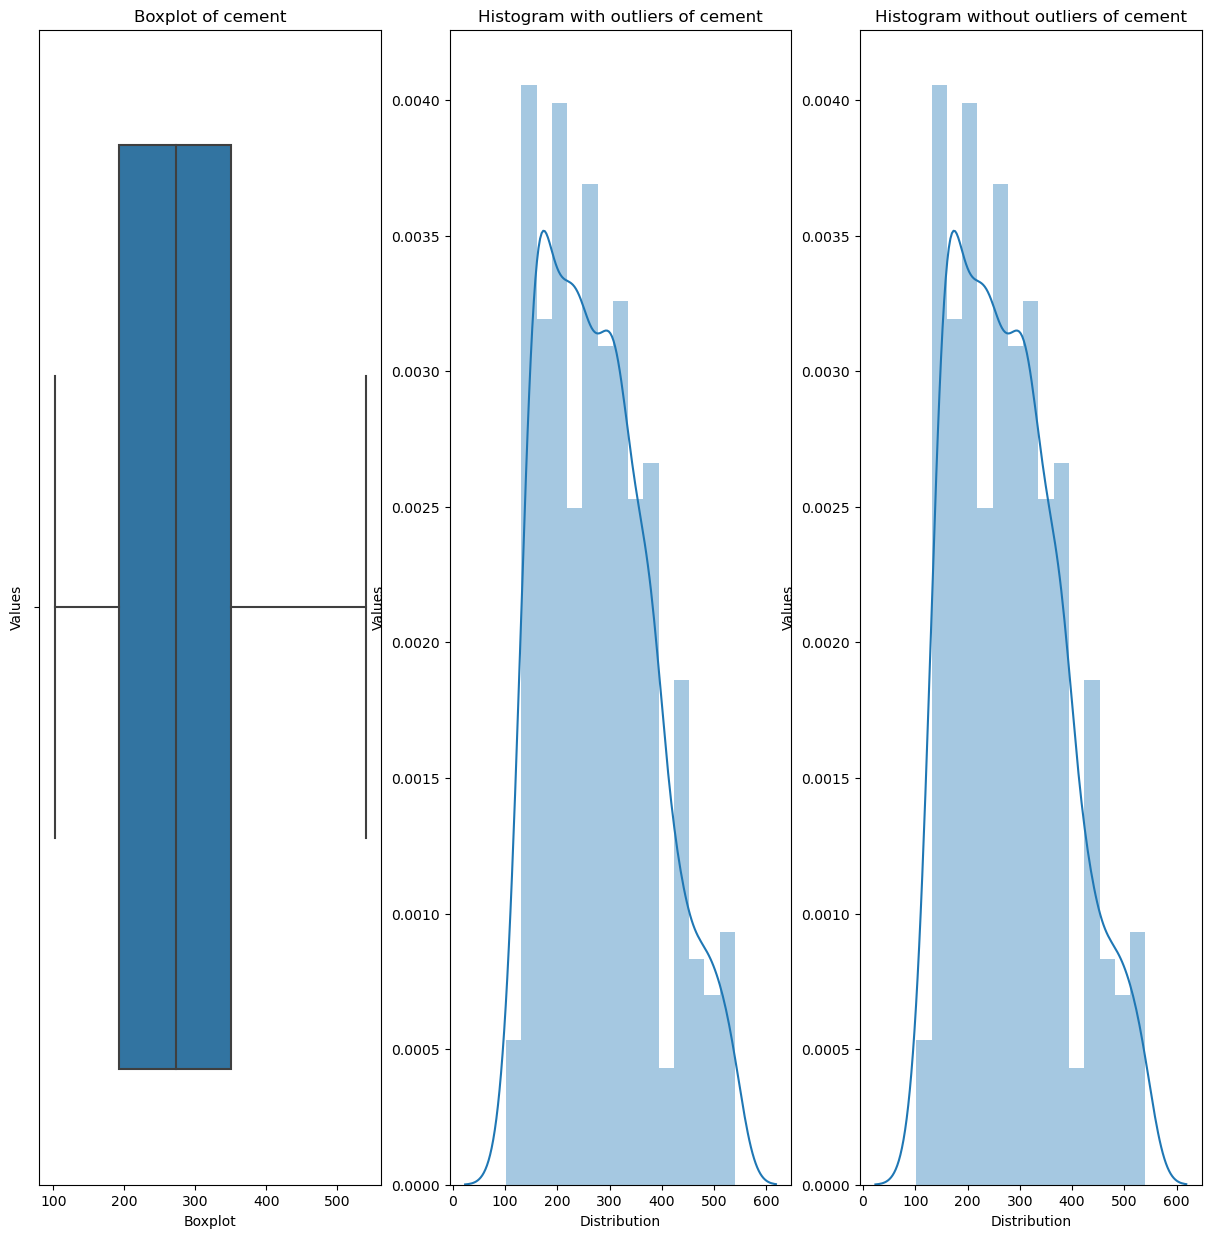

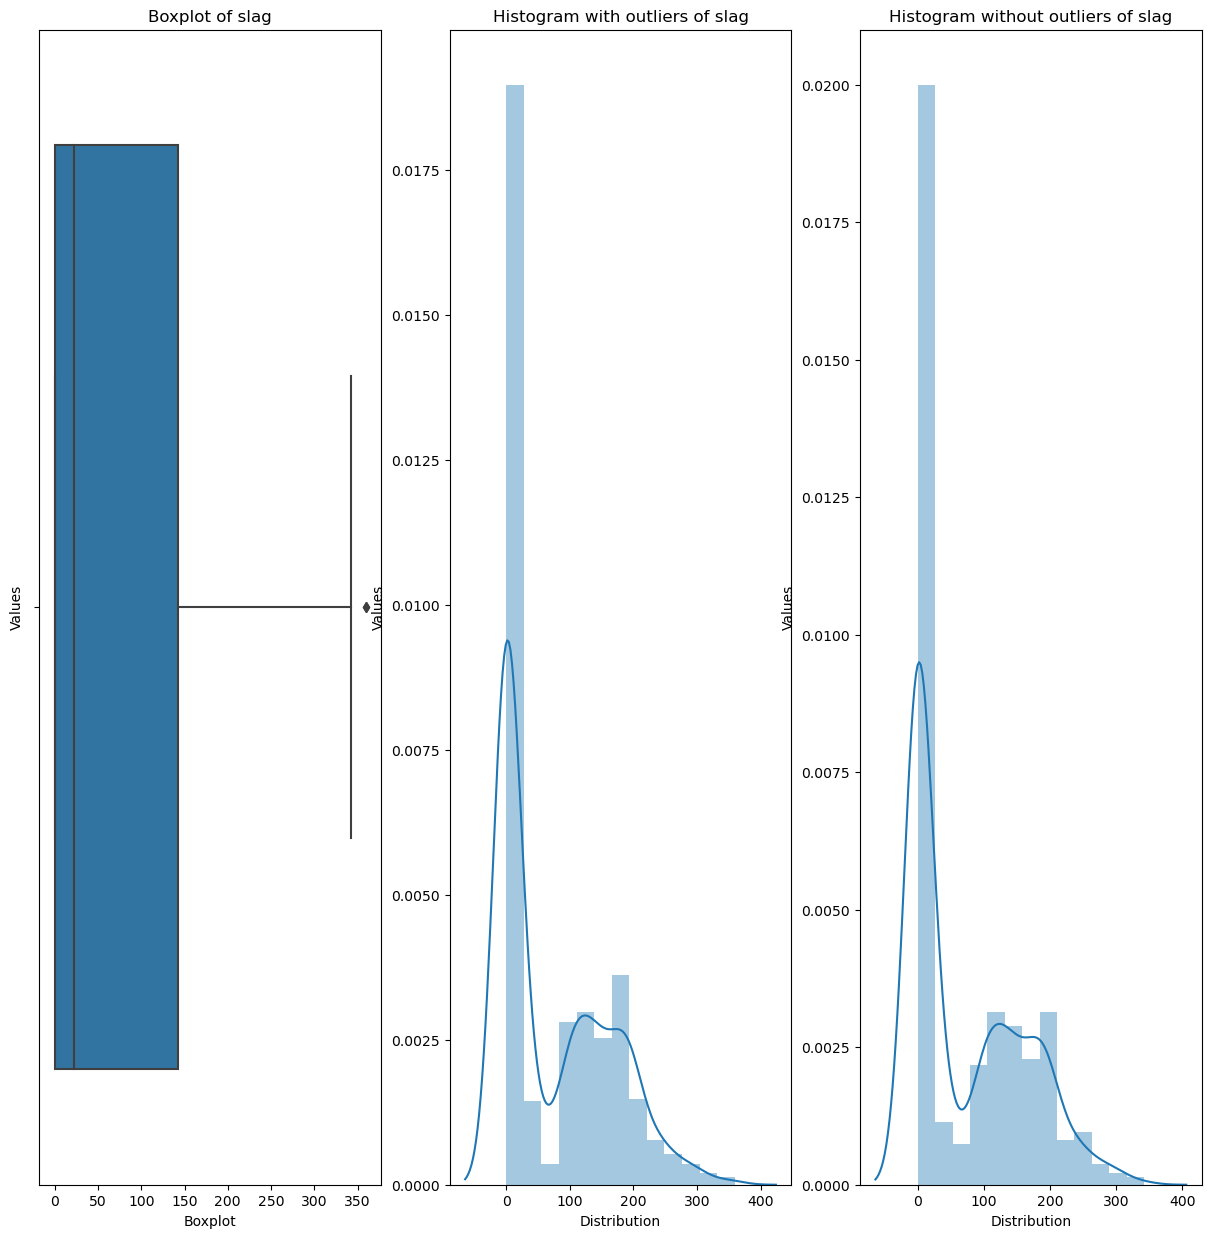

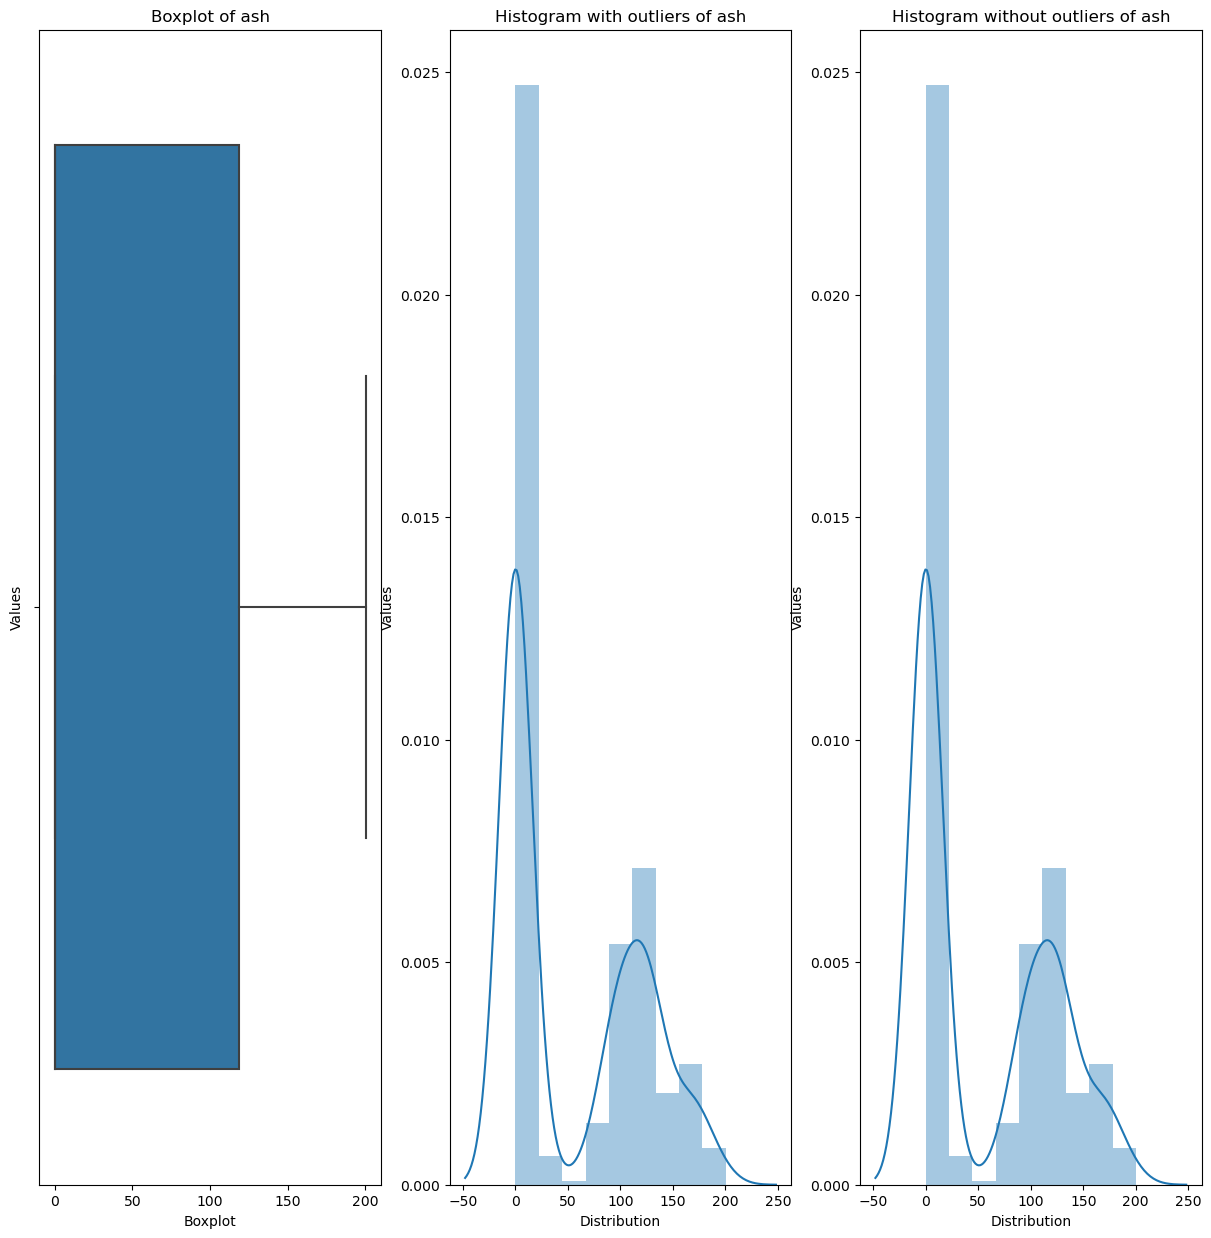

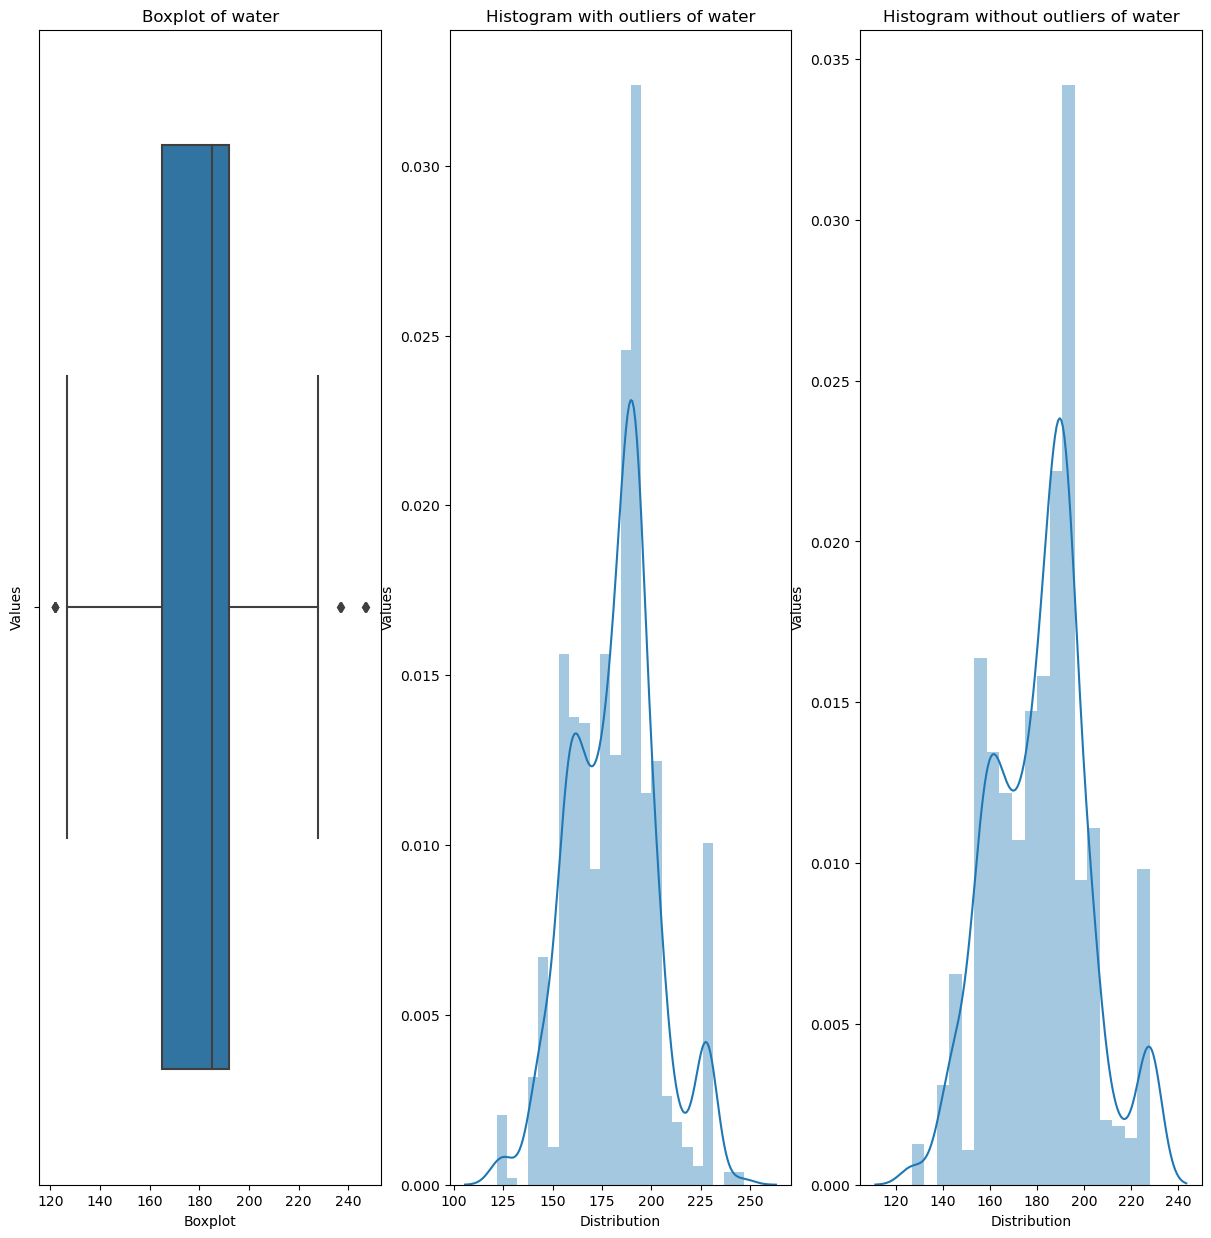

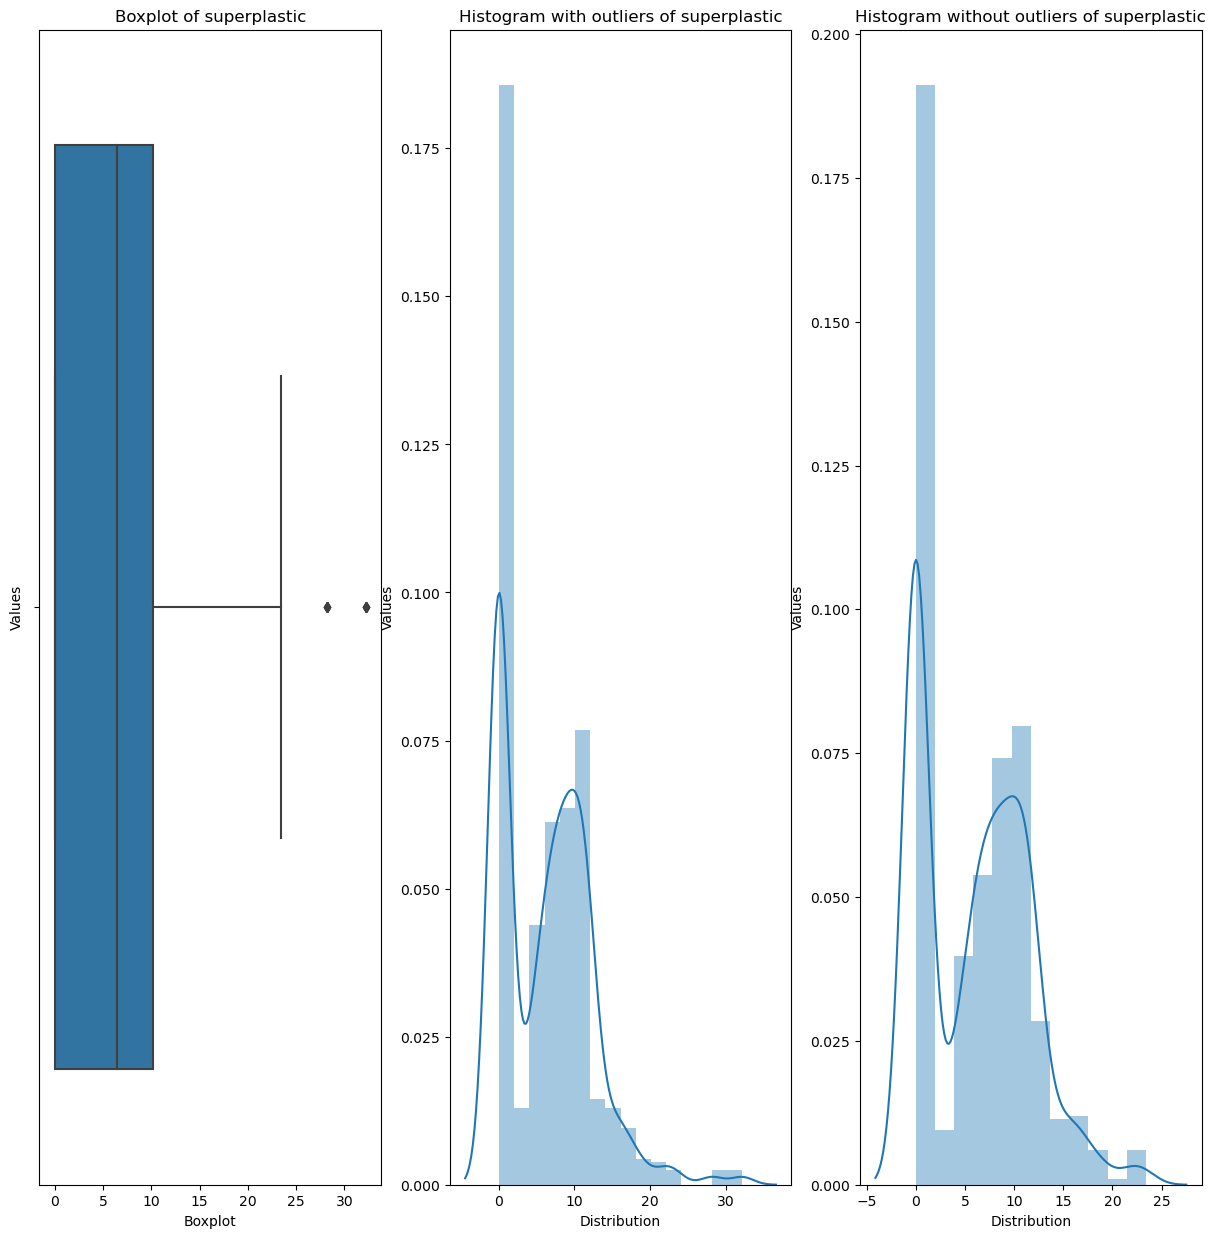

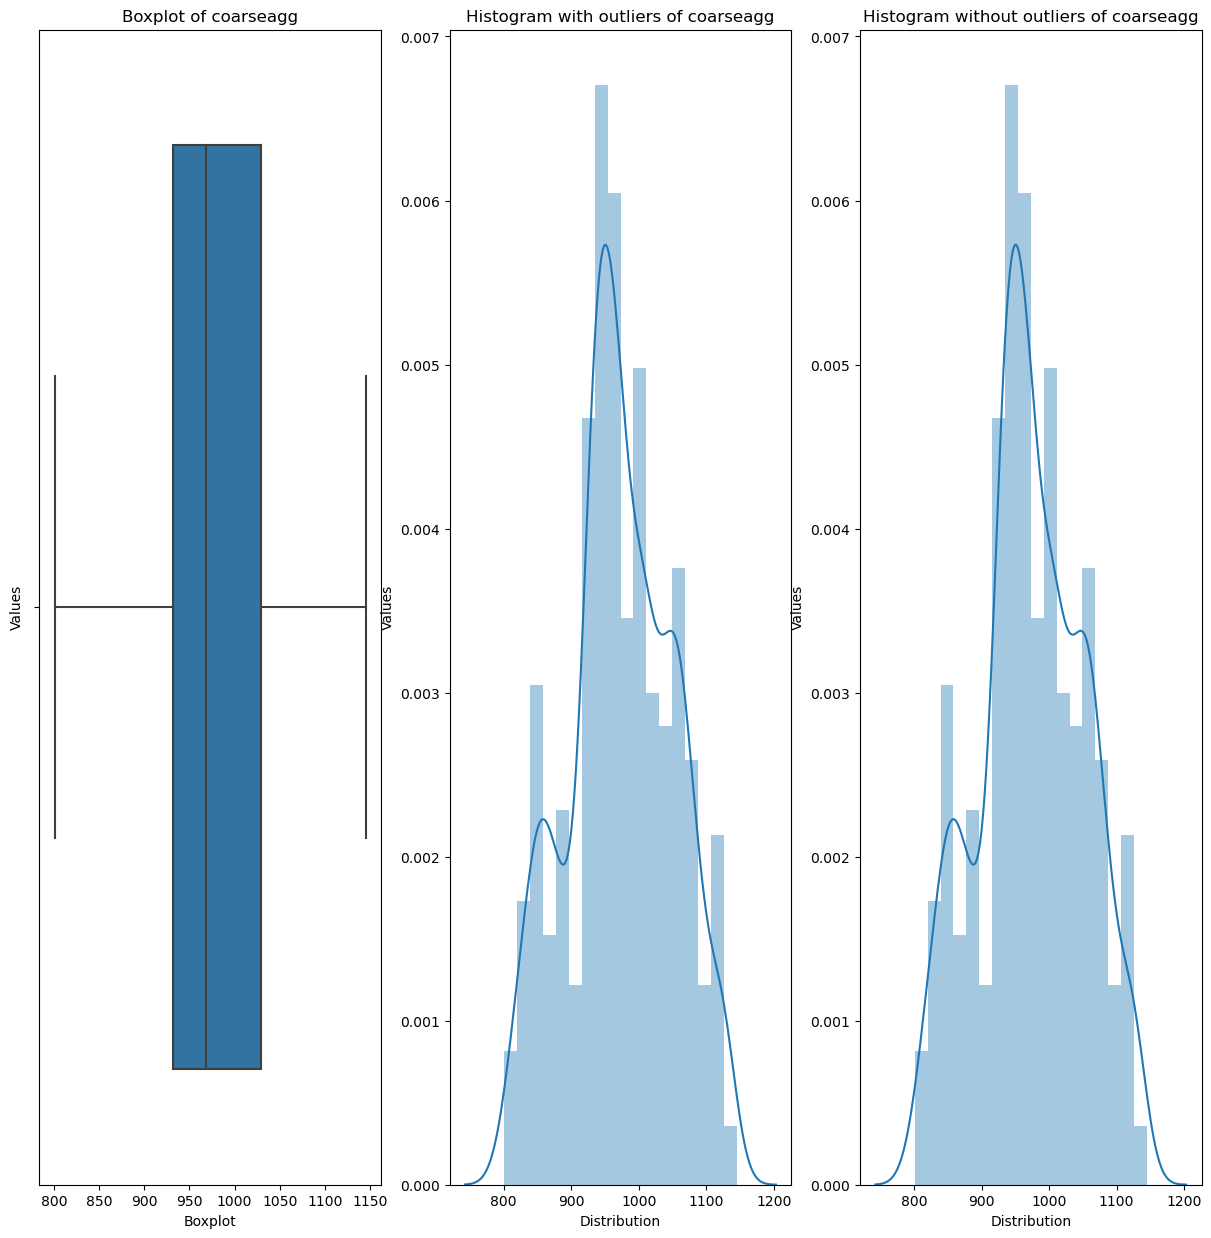

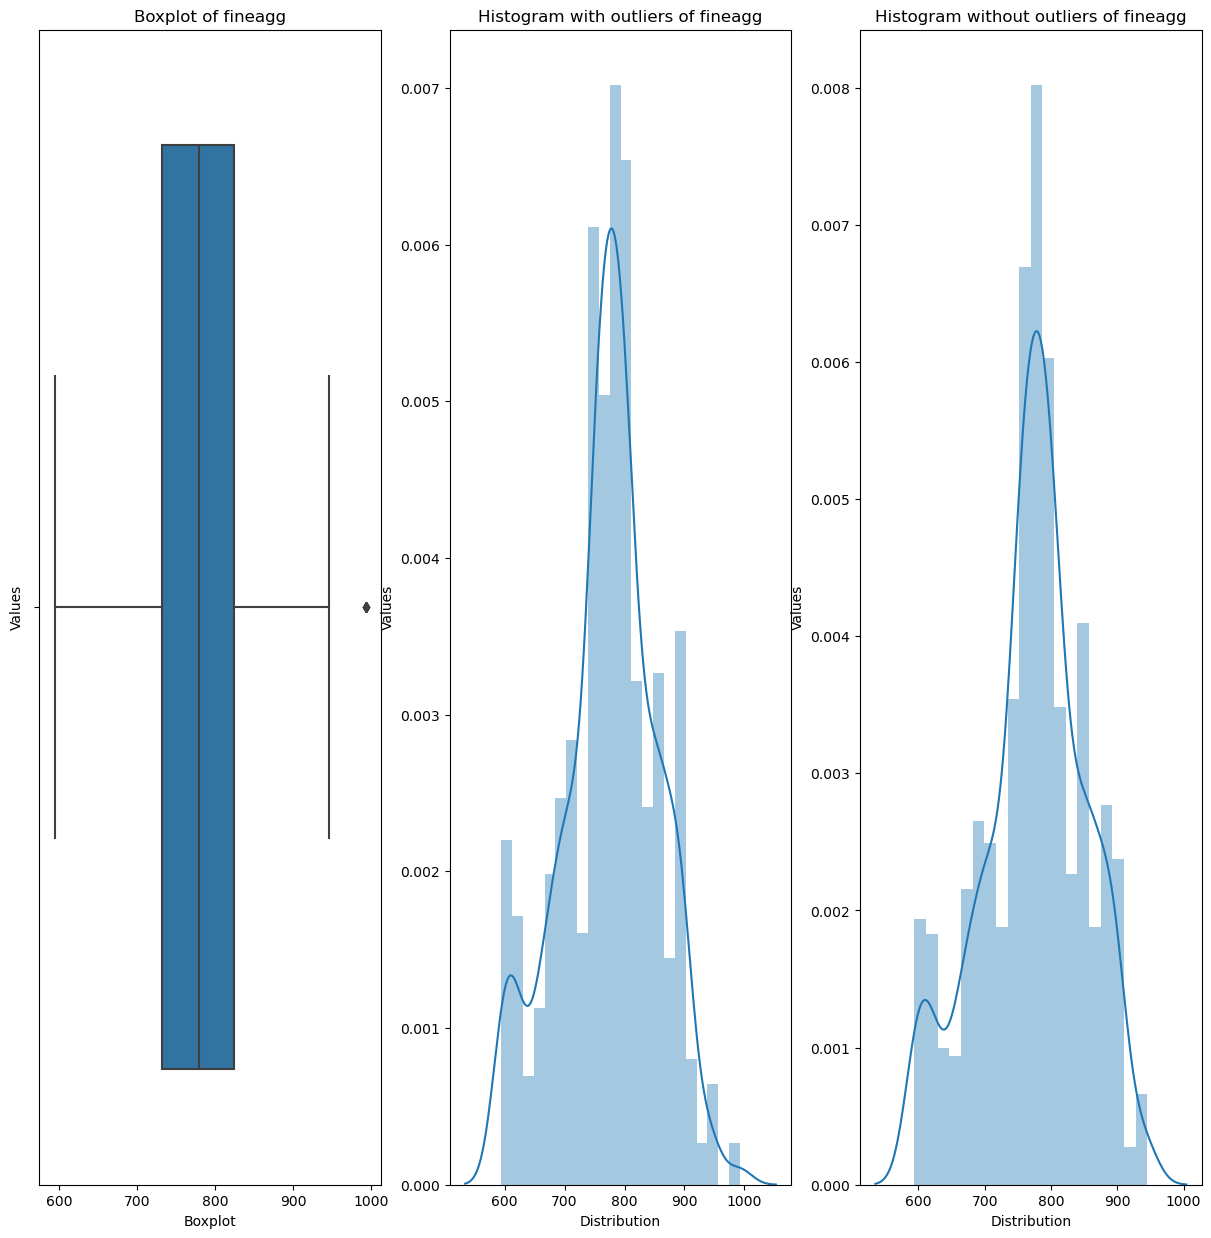

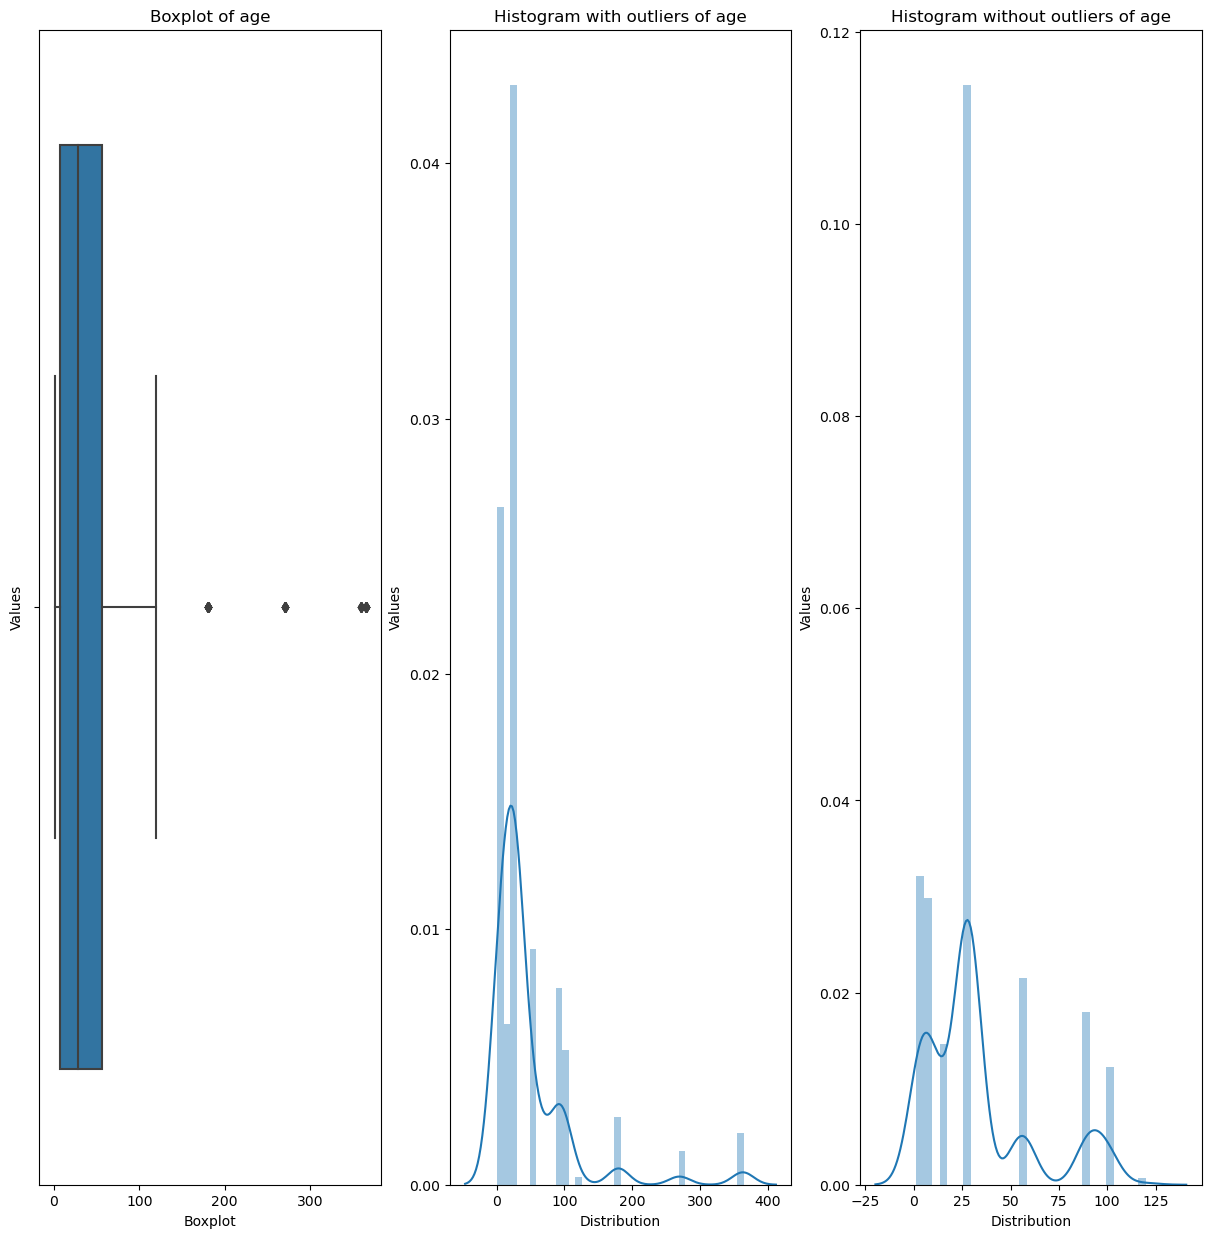

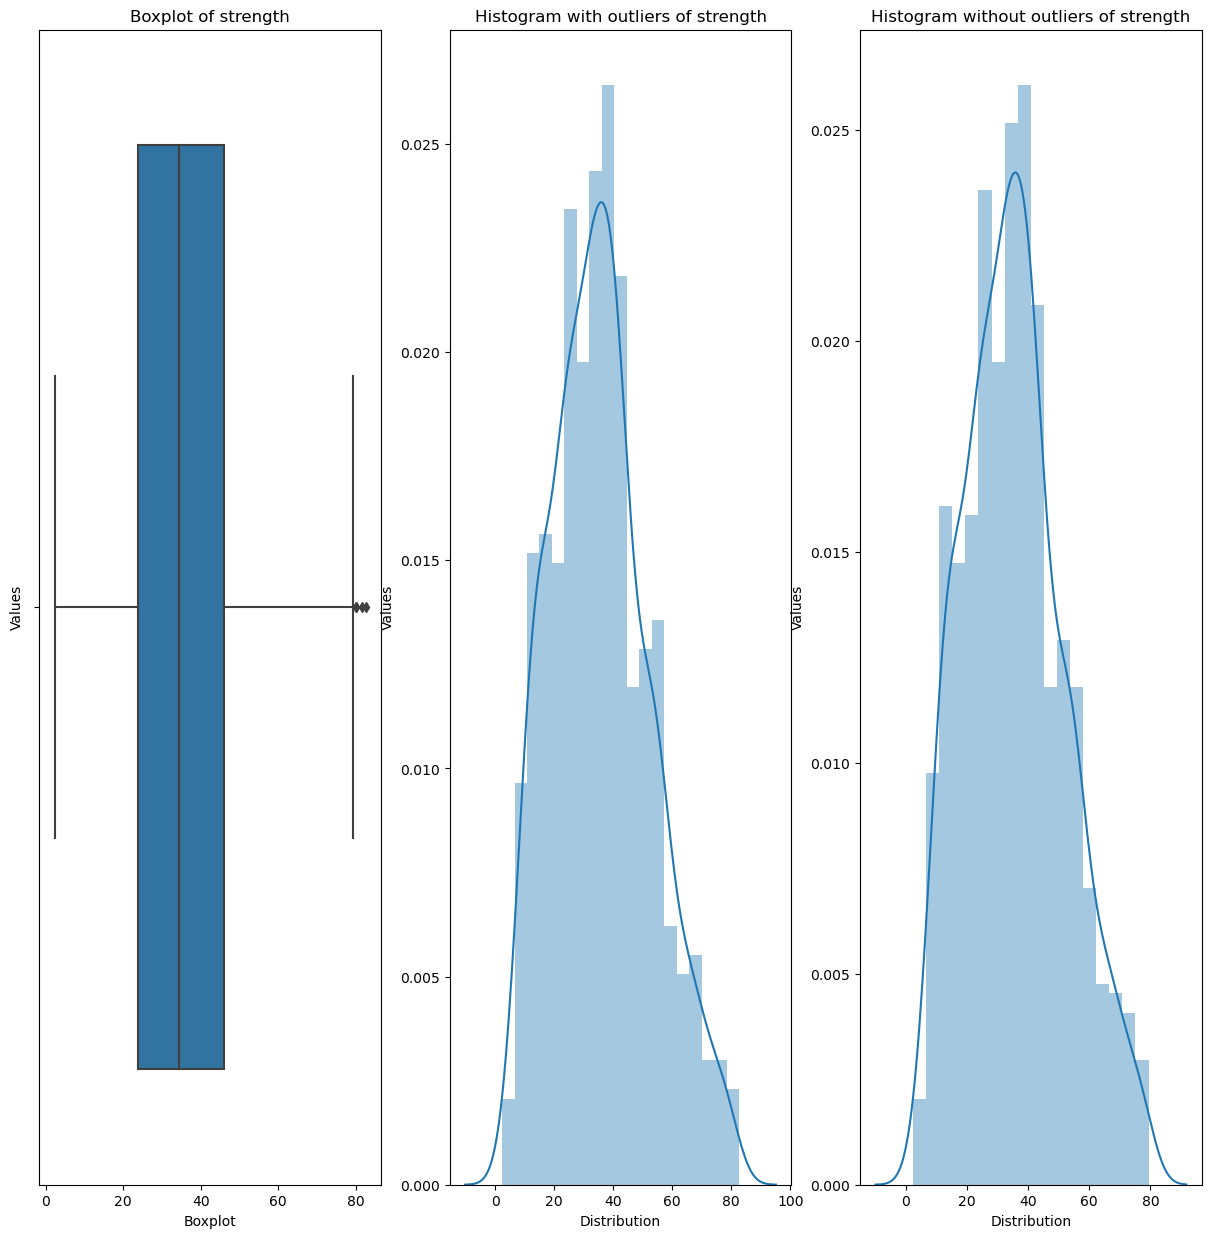

In [10]:
for col in df.columns:
    odt_plots(df,col)

# CHECKING THE CORELATION OF EACH INDEPENDENT VARIABLE WITH THE DEPENDENT VARIABLE (Graphical-Method)

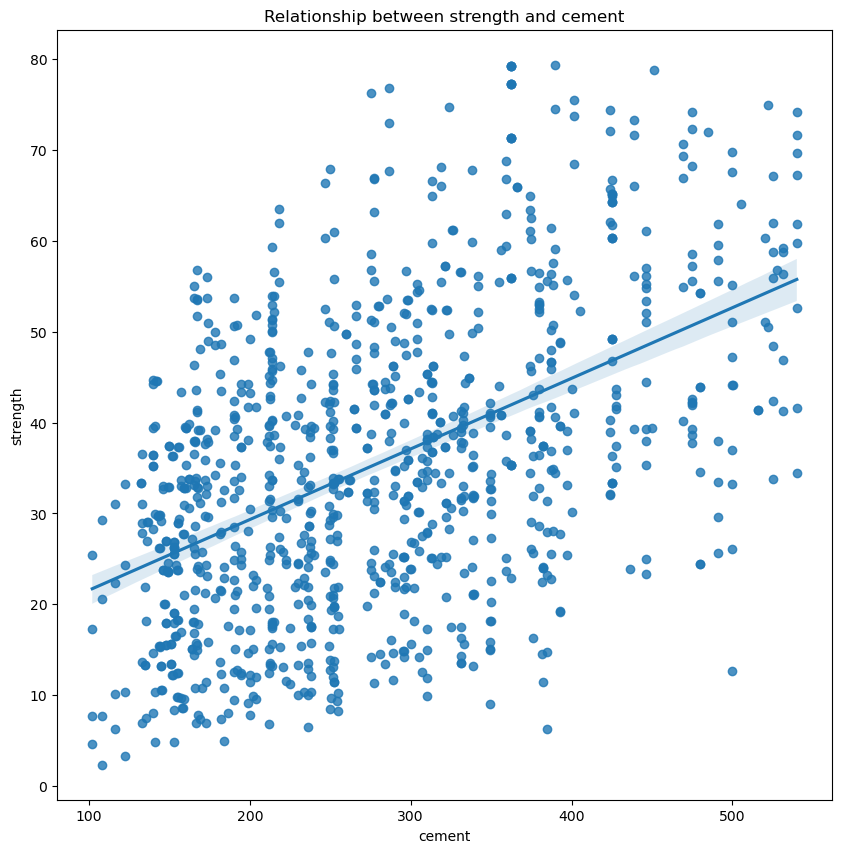

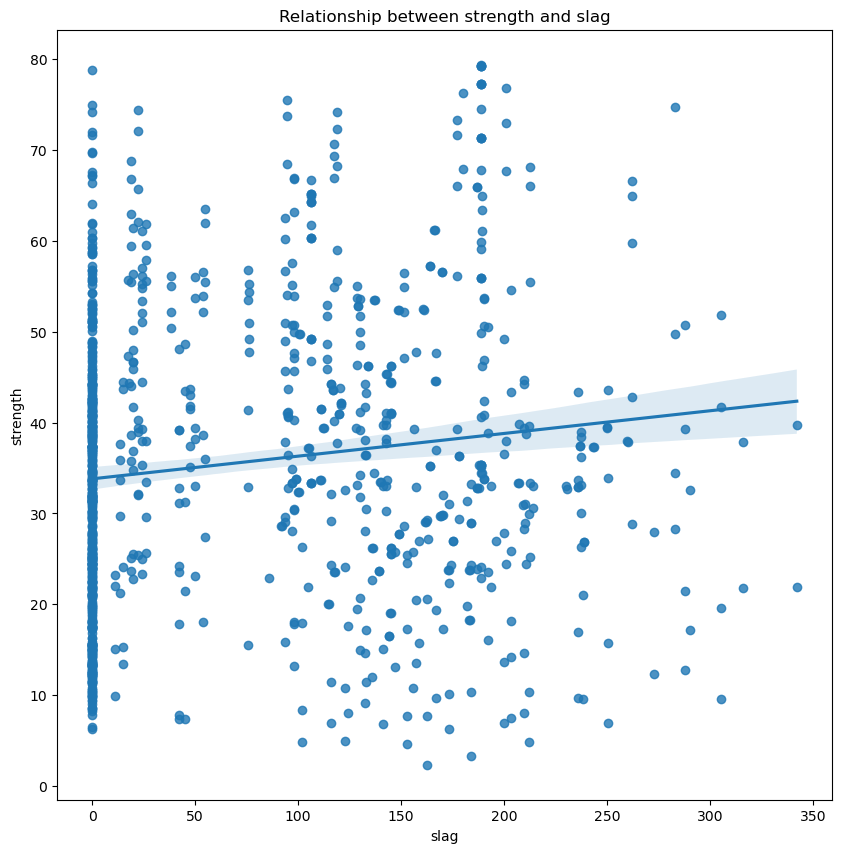

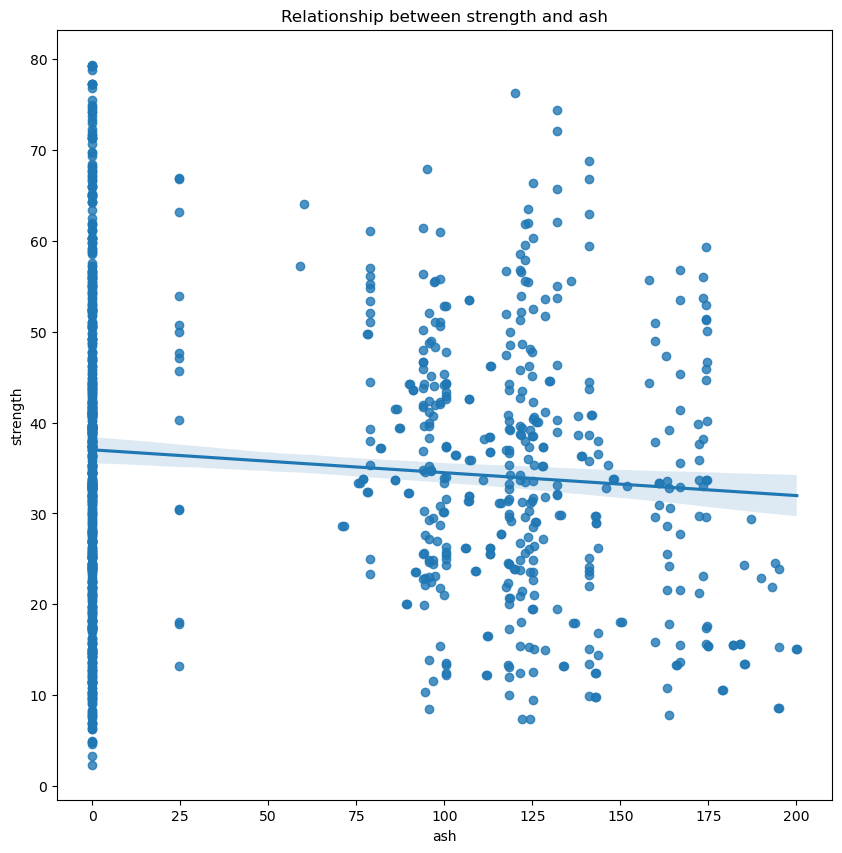

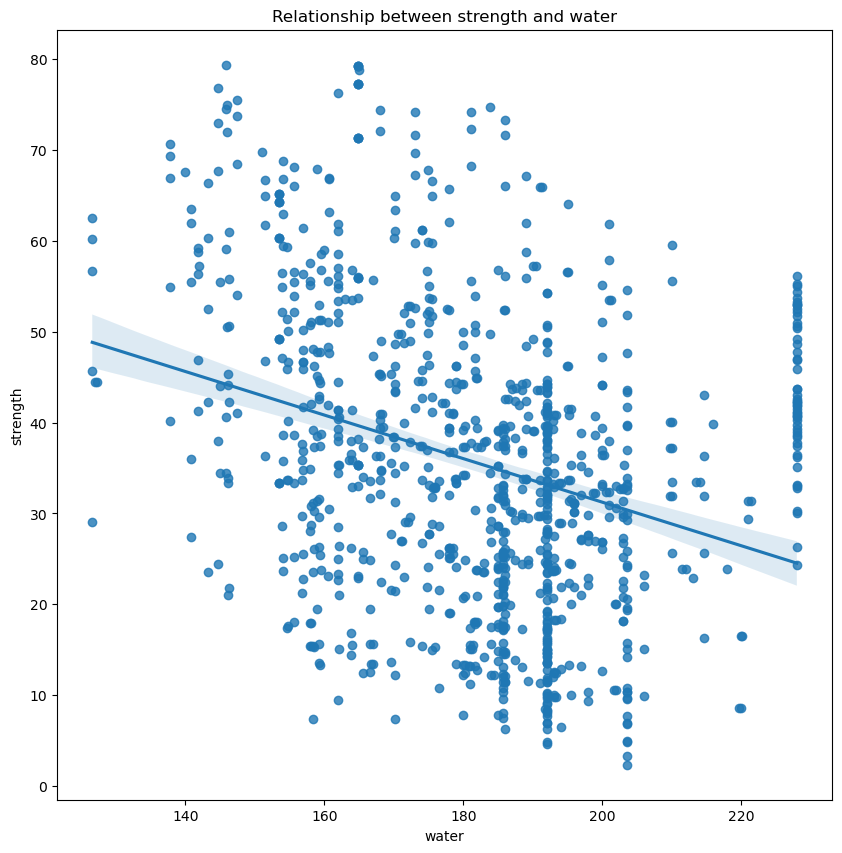

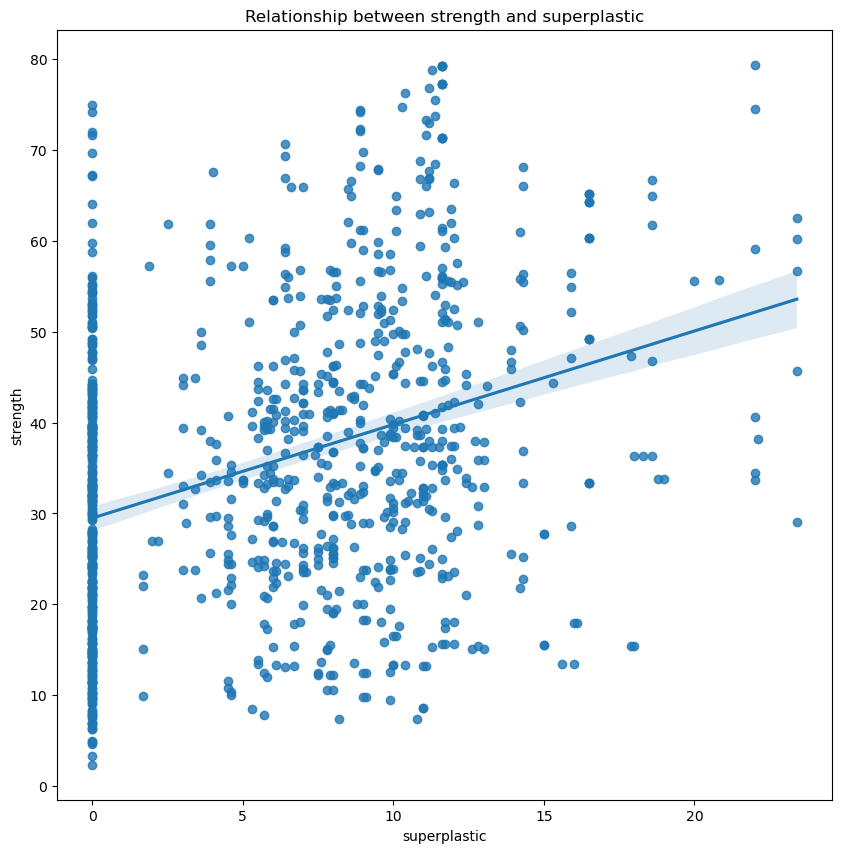

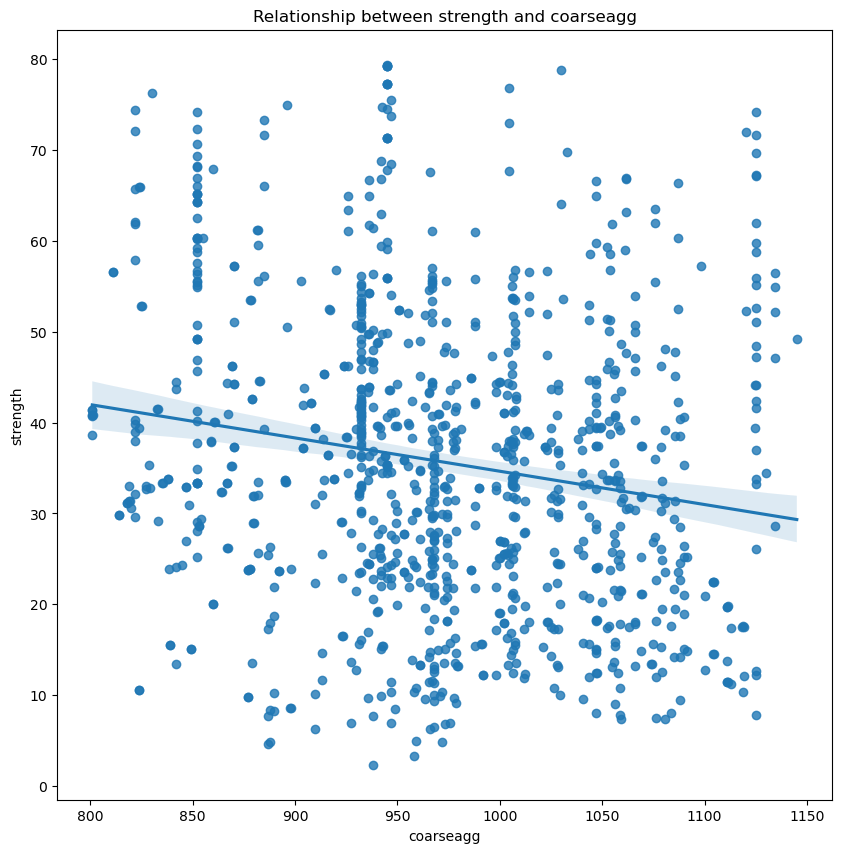

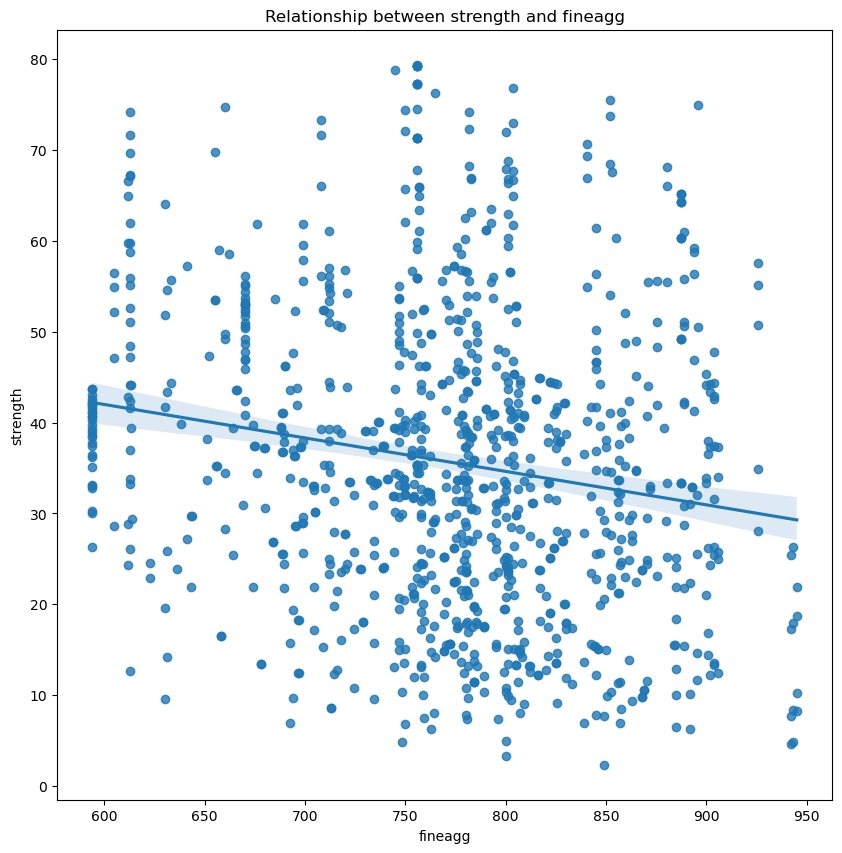

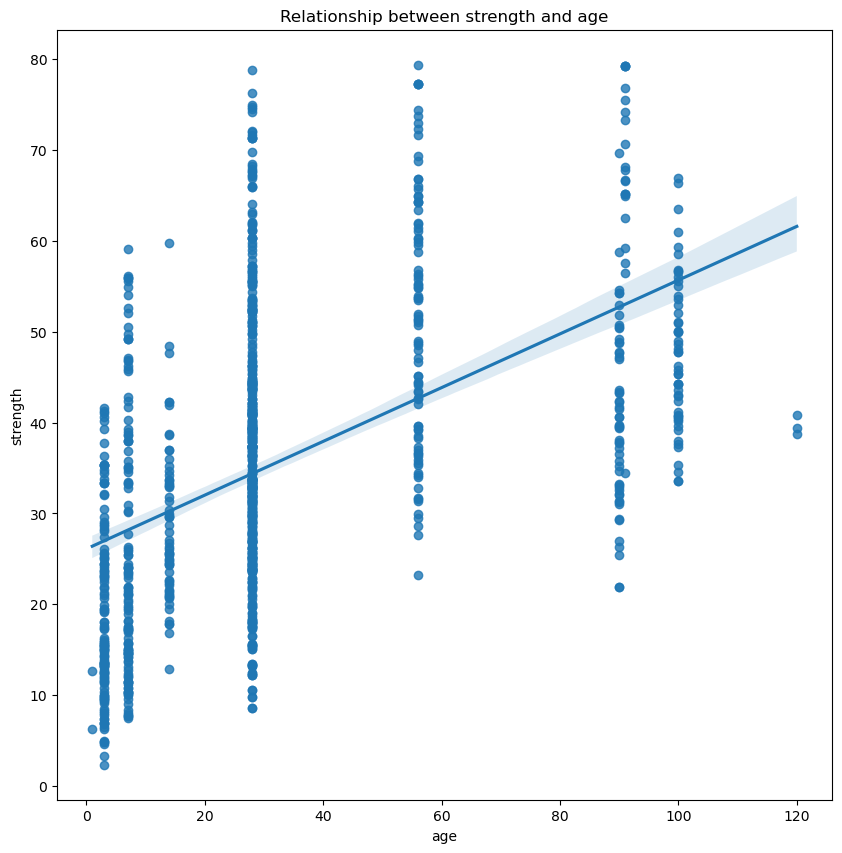

In [11]:
for col in df.columns:
    if col!="strength":
        f,ax1=plt.subplots(figsize=(10,10))
        sns.regplot(x=df[col],y=df["strength"],ax=ax1)
        ax1.set_title(f'Relationship between strength and {col}')

# ANALYSIS AFTER LOOKING AT CO-RELATION 

In [12]:
## Cement is positively co-related with strength
## Slag is positively co-related with strength
## Ash is negatively co-related with strength
## Water is negatively co-related with strength
## Superplastic is positively co-related with strength
## Carseagg is negatively co-related with strength
## Fineeagg is negatively co-related with strength
## Age is positively co-related with strength

# CHECKING THE CORELATION OF EACH INDEPENDENT VARIABLE WITH THE DEPENDENT VARIABLE (Numerical-Method)

In [13]:
def correlation_with_target(data,target_column):
    features=data.drop(target_column,axis=1).columns
    corr=[]
    for col in features:
        corr.append(data[target_column].corr(data[col]))
    result=pd.DataFrame([features,corr],index=['variable','correlation']).T
    return result
        

In [14]:
correlation_with_target(df,"strength")

,variable,correlation
0,cement,0.493518
1,slag,0.129561
2,ash,-0.097973
3,water,-0.300043
4,superplastic,0.342633
5,coarseagg,-0.173234
6,fineagg,-0.176113
7,age,0.499711


In [15]:
# age>cement>superplastic>water>fineagg>coarseagg>slag>ash

# CHECKING MULTI-COLINEARITY

In [16]:
## VIF= VAriance Inflation Factor

In [17]:
##1. VIF is another method to check whether the data has multi-colinearity or not.
##2. In VIF we regress each variable with every other variable and find the r2_score.
##3. The formula for VIF is: 1/(1-r2_score).
##4. If the Vif value is more than 5 we say multi-colinearity exists.

In [18]:
def vif_score(ind_var):
    vif=pd.DataFrame()
    vif["features"]=ind_var.columns
    vif["vif_score"]=[variance_inflation_factor(ind_var.values,i) for i in range(ind_var.shape[1])]
    return vif 

In [19]:
vif_score(df.drop("strength",axis=1))

,features,vif_score
0,cement,14.291158
1,slag,3.342314
2,ash,4.415840
3,water,81.963087
4,superplastic,5.724145
5,coarseagg,86.938582
6,fineagg,68.664404
7,age,2.368372


In [20]:
corr=df.corr()

<AxesSubplot:>

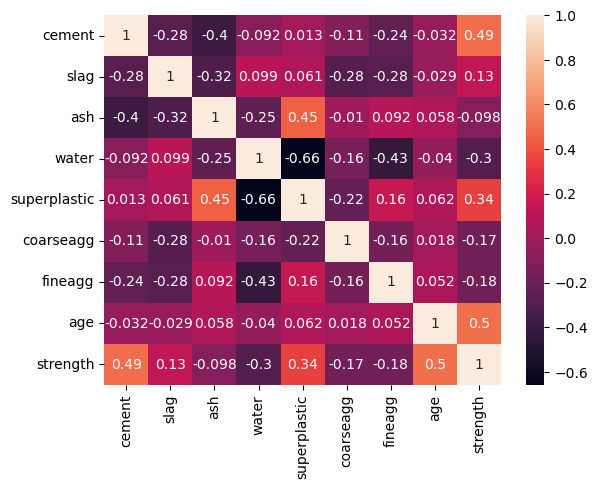

In [21]:
sns.heatmap(corr,annot=True)

In [22]:
## Ash V/s Slag= 32%
## Ash v/s Superplastic= 45%
## water v/s superplastic= 66%
## water v/s fineagg= 43%

In [23]:
## TO do PCA we need to take approvals from the clients as the data looses it's originality

In [24]:
## FROM VIF AND HEATMAP WE COME TO A CONCLUSION THAT THE REQUIRES PCA.

# PCA

In [25]:
def apply_pca(x):
    ncom=len(x.columns)
    
    ## Standardscaler
    sc=StandardScaler()
    x=sc.fit_transform(x)
    
    ## Applying PCA
    pca=PCA()
    for i in range (1,ncom):
        pca=PCA(n_components=i)
        p_com=pca.fit_transform(x)
        evr=np.cumsum(pca.explained_variance_ratio_)
        if evr[i-1]>0.9:
            n_components=i
            break
            
    
    print("THE TOTAL DATA CAPTURED IS:",evr)
    
    col=[]
    for j in range(1,n_components+1):
        col.append("pc_"+str(j))
    
    pca_df=pd.DataFrame(p_com,columns=col)
    
    return pca_df
        

In [26]:
transformed_df=apply_pca(df.drop("strength",axis=1))

THE TOTAL DATA CAPTURED IS: [0.27112429 0.44666571 0.60914114 0.73584634 0.85926016 0.97264602]


In [27]:
transformed_df

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6
0,1.810919,1.331664,-1.284484,-0.306148,-0.067652,-0.886110
1,-1.823833,-0.573436,-1.058973,0.893130,-0.913984,-0.751061
2,-0.739819,-0.463200,-0.541643,-1.033210,-0.308068,0.611045
3,2.766368,0.602978,-0.512532,0.008806,0.086415,0.850548
4,0.892523,0.966627,-0.863624,1.148561,-0.064439,-1.221228
...,...,...,...,...,...,...
1025,-1.743036,0.071059,-1.492203,0.045227,-0.449481,0.968953
1026,-1.079147,-0.572265,3.269799,-1.669125,-0.962953,0.002303
1027,-0.494143,1.276989,0.318398,-0.053272,-0.153787,0.751019
1028,2.688411,-0.236744,0.056551,-0.088955,0.105206,1.368321


In [28]:
vif_score(transformed_df)

,features,vif_score
0,pc_1,1.0
1,pc_2,1.0
2,pc_3,1.0
3,pc_4,1.0
4,pc_5,1.0
5,pc_6,1.0


In [29]:
x= transformed_df
y=df[["strength"]]

In [30]:
def train_and_test_split(x,y,testsize=0.3,randomstate=40):
    return train_test_split(x,y,test_size=testsize,random_state=randomstate)

In [31]:
def build_model(model_name,estimator,x,y):
    x_train,x_test,y_train,y_test=train_and_test_split(x,y)
    estimator.fit(x_train,y_train)
    y_pred=estimator.predict(x_test)
    r2score=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    
    temp=[model_name,r2score,rmse]
    
    
    return temp

In [32]:
build_model("Linear Regression",LinearRegression(),x,y)

['Linear Regression', 0.6719558938761188, 9.32019549758269]

# BUILDING MULTIPLE MODELS

In [33]:
def multiple_models(x,y):
    result_df=pd.DataFrame(columns=["model_name","r2score","rmse"])
    result_df.loc[len(result_df)]=build_model("Linear Regression",LinearRegression(),x,y)
    result_df.loc[len(result_df)]=build_model("Lasso",Lasso(),x,y)
    result_df.loc[len(result_df)]=build_model("Ridge",Ridge(),x,y)
    result_df.loc[len(result_df)]=build_model("Decision Tree",DecisionTreeRegressor(),x,y)
    result_df.loc[len(result_df)]=build_model("SVM",SVR(),x,y)
    result_df.loc[len(result_df)]=build_model("Random Forest",RandomForestRegressor(),x,y)
    result_df.loc[len(result_df)]=build_model("KNN",KNeighborsRegressor(),x,y)
    result_df.loc[len(result_df)]=build_model("AdaBoost",AdaBoostRegressor(),x,y)
    result_df.loc[len(result_df)]=build_model("GBoost",GradientBoostingRegressor(),x,y)
    result_df.loc[len(result_df)]=build_model("XGB Regressor",XGBRegressor(),x,y)
    return result_df

In [34]:
multiple_models(x,y)

,model_name,r2score,rmse
0,Linear Regression,0.671956,9.320195
1,Lasso,0.655825,9.546597
2,Ridge,0.671954,9.320220
3,Decision Tree,0.755573,8.045142
4,SVM,0.653021,9.585403
5,Random Forest,0.854031,6.217114
6,KNN,0.749843,8.138898
7,AdaBoost,0.730561,8.446733
8,GBoost,0.827079,6.766793
9,XGB Regressor,0.843865,6.429975


# APPLYING CROSS-VALIDATION

In [35]:
def cross_validation(x,y,fold=10):
    
    score_lr=cross_val_score(LinearRegression(),x,y,cv=fold)
    score_la=cross_val_score(Lasso(),x,y,cv=fold)
    score_rd=cross_val_score(Ridge(),x,y,cv=fold)
    score_knn=cross_val_score(KNeighborsRegressor(),x,y,cv=fold)
    score_dt=cross_val_score(DecisionTreeRegressor(),x,y,cv=fold)
    score_rf=cross_val_score(RandomForestRegressor(),x,y,cv=fold)
    score_svr=cross_val_score(SVR(),x,y,cv=fold)
    score_ab=cross_val_score(AdaBoostRegressor(),x,y,cv=fold)
    score_gb=cross_val_score(GradientBoostingRegressor(),x,y,cv=fold)
    score_xg=cross_val_score(XGBRegressor(),x,y,cv=fold)
    
    models=["Linear Regression","Lasso","Ridge","KNN","Decison Tree","Random Forest","SVR","AdaBoost","GBoost","XGBoost"]
    scores=[score_lr,score_la,score_rd,score_knn,score_dt,score_rf,score_svr,score_ab,score_gb,score_xg]
    
    result=[]
    for i in range(0,len(models)):
        score_mean=np.mean(scores[i])
        score_strd=np.std(scores[i])
        score_name=models[i]
        temp=[score_name,score_mean,score_strd]
        result.append(temp)
        
    result_df=pd.DataFrame(result,columns=["Model_name","Score","Standard deviation"])
    return result_df
    

In [36]:
cross_validation(x,y)

,Model_name,Score,Standard deviation
0,Linear Regression,0.663928,0.059476
1,Lasso,0.649837,0.049887
2,Ridge,0.663935,0.059437
3,KNN,0.768291,0.055999
4,Decison Tree,0.753180,0.062161
5,Random Forest,0.866583,0.031887
6,SVR,0.703117,0.042765
7,AdaBoost,0.723175,0.035761
8,GBoost,0.829272,0.050291
9,XGBoost,0.873262,0.036061


# HYPER-PARAMETER TUNING

In [37]:
## KNN,GBOOST,XGBOOST,RANDOM FOREST

In [38]:
def hyperparameter_tuning(x,y,fold=10):
    
    param_knn={"n_neighbors":[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]}
    param_rf={"n_estimators":[100,150,200,250,300,350,400,450,500]}
    param_gb={"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    param_xgb={"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
    
    grid_knn=GridSearchCV(KNeighborsRegressor(),param_grid=param_knn,cv=fold)
    grid_rf=GridSearchCV(RandomForestRegressor(),param_grid=param_rf,cv=fold)
    grid_gb=GridSearchCV(GradientBoostingRegressor(),param_grid=param_gb,cv=fold)
    grid_xgb=GridSearchCV(XGBRegressor(),param_grid=param_xgb,cv=fold)
    
    grid_knn.fit(x,y)
    grid_rf.fit(x,y)
    grid_gb.fit(x,y)
    grid_xgb.fit(x,y)
    
    
    grid=[grid_knn,grid_rf,grid_gb,grid_xgb]
    names=["KNN","Random Forest","GBoost","XGBoost"]
    
    for i in range(0,len(names)):
        print("MODEL:",names[i])
        print("best_param:",grid[i].best_params_)
        print("best_score",grid[i].best_score_)
    

In [39]:
hyperparameter_tuning(x,y)

MODEL: KNN
best_param: {'n_neighbors': 10}
best_score 0.7375000446307654
MODEL: Random Forest
best_param: {'n_estimators': 500}
best_score 0.8691389857763786
MODEL: GBoost
best_param: {'alpha': 0.4}
best_score 0.8295495896706262
MODEL: XGBoost
best_param: {'alpha': 1}
best_score 0.8779974393086987


# CLUSTERING

In [42]:
clusters=KMeans(n_clusters=2,random_state=40).fit_predict(df.drop("strength",axis=1))

<AxesSubplot:xlabel='cement', ylabel='strength'>

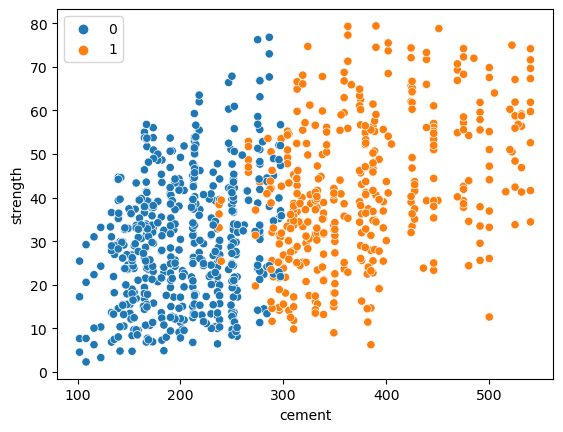

In [44]:
sns.scatterplot(x=df["cement"],y=df["strength"],hue=clusters)

<AxesSubplot:xlabel='slag', ylabel='strength'>

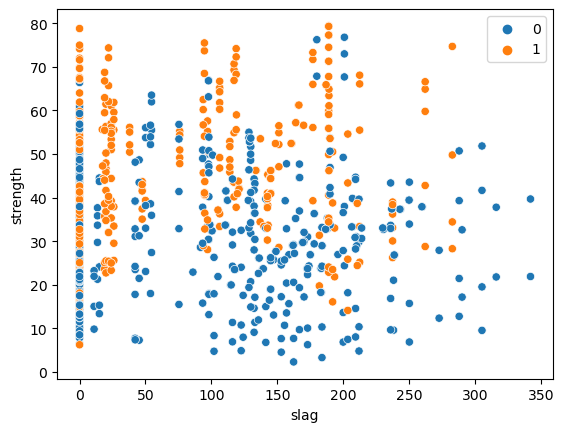

In [45]:
sns.scatterplot(x=df["slag"],y=df["strength"],hue=clusters)

<AxesSubplot:xlabel='ash', ylabel='strength'>

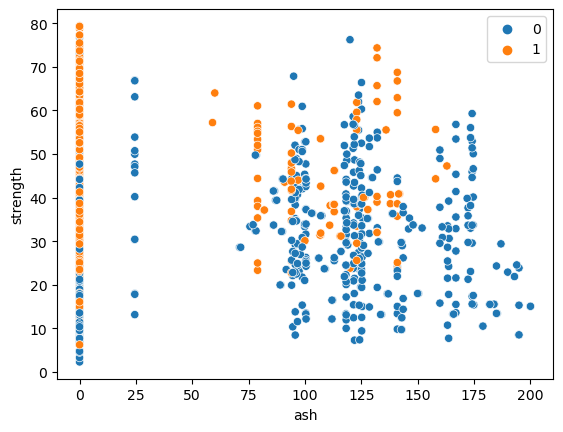

In [46]:
sns.scatterplot(x=df["ash"],y=df["strength"],hue=clusters)

<AxesSubplot:xlabel='water', ylabel='strength'>

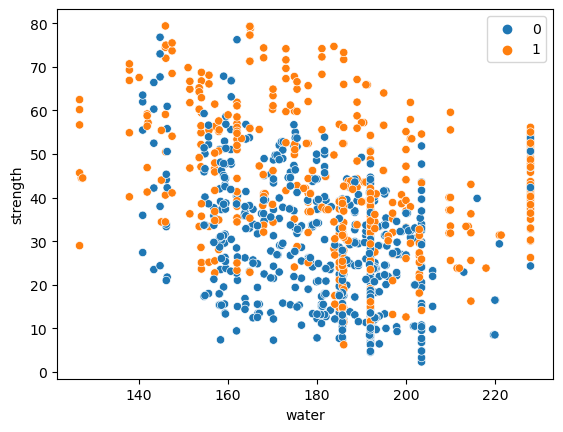

In [47]:
sns.scatterplot(x=df["water"],y=df["strength"],hue=clusters)

<AxesSubplot:xlabel='superplastic', ylabel='strength'>

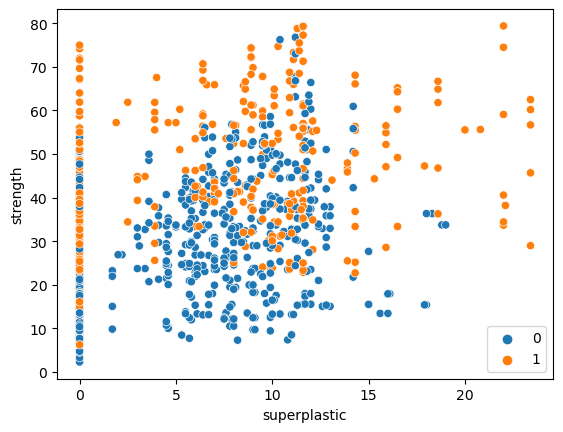

In [48]:
sns.scatterplot(x=df["superplastic"],y=df["strength"],hue=clusters)

<AxesSubplot:xlabel='fineagg', ylabel='strength'>

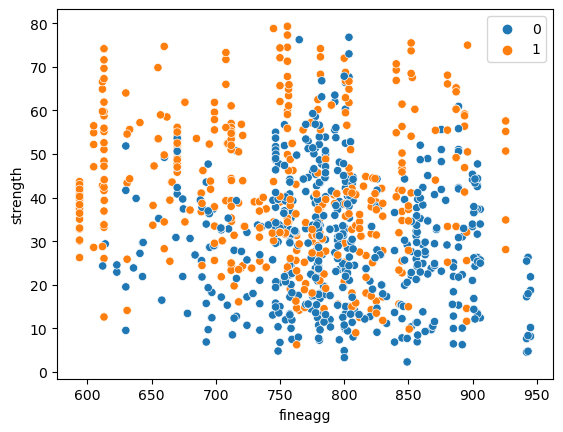

In [49]:
sns.scatterplot(x=df["fineagg"],y=df["strength"],hue=clusters)

<AxesSubplot:xlabel='coarseagg', ylabel='strength'>

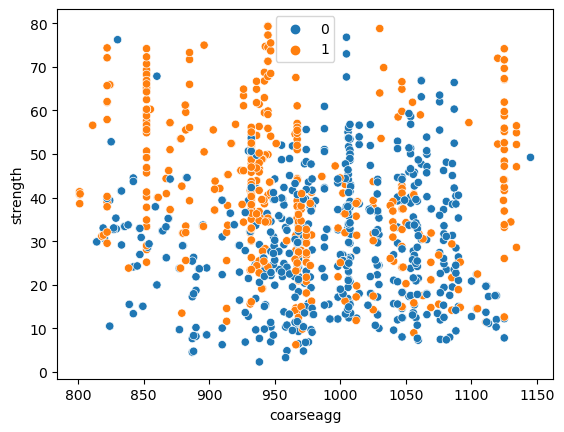

In [50]:
sns.scatterplot(x=df["coarseagg"],y=df["strength"],hue=clusters)

<AxesSubplot:xlabel='age', ylabel='strength'>

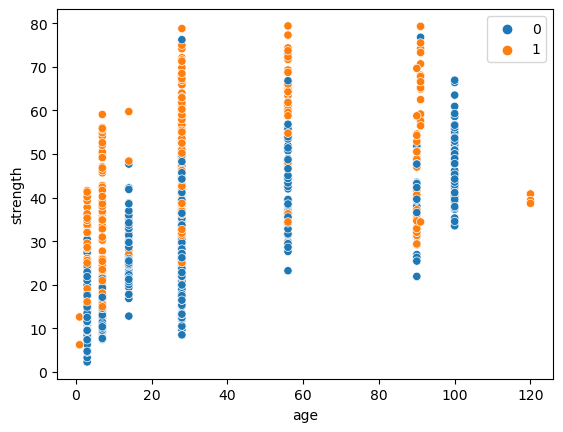

In [51]:
sns.scatterplot(x=df["age"],y=df["strength"],hue=clusters)

In [52]:
## From the above graphs we conclude that only cement has clusters with strength

In [53]:
df_cluster=df.join(pd.DataFrame(clusters,columns=["clusters"]),how="left")

In [54]:
df_cluster

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,clusters
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,1
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,0
...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29,0
1026,531.3,0.0,0.0,141.8,6.4,852.1,893.7,3,41.30,1
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,0
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,28,55.06,1


In [55]:
x=df_cluster.drop("strength",axis=1)
y=df[["strength"]]

In [56]:
multiple_models(x,y)

,model_name,r2score,rmse
0,Linear Regression,0.697960,8.943170
1,Lasso,0.697402,8.951418
2,Ridge,0.697970,8.943015
3,Decision Tree,0.797907,7.315346
4,SVM,0.188102,14.662558
5,Random Forest,0.877538,5.694561
6,KNN,0.627213,9.935484
7,AdaBoost,0.734063,8.391673
8,GBoost,0.873360,5.790888
9,XGB Regressor,0.886559,5.480803


In [57]:
cross_validation(x,y)

,Model_name,Score,Standard deviation
0,Linear Regression,0.686680,0.062293
1,Lasso,0.686684,0.062488
2,Ridge,0.686688,0.062295
3,KNN,0.668248,0.085736
4,Decison Tree,0.826667,0.053406
5,Random Forest,0.887132,0.032795
6,SVR,0.223931,0.038833
7,AdaBoost,0.737757,0.034182
8,GBoost,0.875298,0.046367
9,XGBoost,0.901949,0.042320


# PERFORMING FEATURE IMPORTANCE XGBOOST

In [58]:
xgb=XGBRegressor()

In [59]:
xgb.fit(x,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [65]:
##xgboost.plot_importance(xgb)

In [66]:
x=df[["age","cement","water","coarseagg","slag","fineagg"]]
y=df[["strength"]]

In [68]:
multiple_models(x,y)

,model_name,r2score,rmse
0,Linear Regression,0.686621,9.109481
1,Lasso,0.686445,9.112042
2,Ridge,0.686621,9.109482
3,Decision Tree,0.798262,7.308906
4,SVM,0.213832,14.428344
5,Random Forest,0.875061,5.751857
6,KNN,0.632129,9.869760
7,AdaBoost,0.748572,8.159549
8,GBoost,0.868288,5.905700
9,XGB Regressor,0.881048,5.612349


In [69]:
cross_validation(x,y)

,Model_name,Score,Standard deviation
0,Linear Regression,0.679539,0.061858
1,Lasso,0.679548,0.061547
2,Ridge,0.679539,0.061858
3,KNN,0.656356,0.087734
4,Decison Tree,0.825668,0.047202
5,Random Forest,0.884266,0.035195
6,SVR,0.261459,0.037619
7,AdaBoost,0.728572,0.034010
8,GBoost,0.875478,0.046378
9,XGBoost,0.895727,0.046665


# LEARNING-CURVE ANALYSIS

In [76]:
def learningcurve(modelname,estimator,x,y,fold=10):
    train_size,train_score,test_score=learning_curve(estimator,x,y,cv=fold)
    train_score_mean=np.mean(train_score,axis=1)
    test_score_mean=np.mean(test_score,axis=1)
    
    plt.plot(train_size,train_score_mean,color='green')
    plt.plot(train_size,test_score_mean,color='blue')
    plt.xlabel("sample")
    plt.ylabel("Accuracy score")
    plt.title(f"Learning Curve for {modelname}")
    plt.legend(["training","testing"])

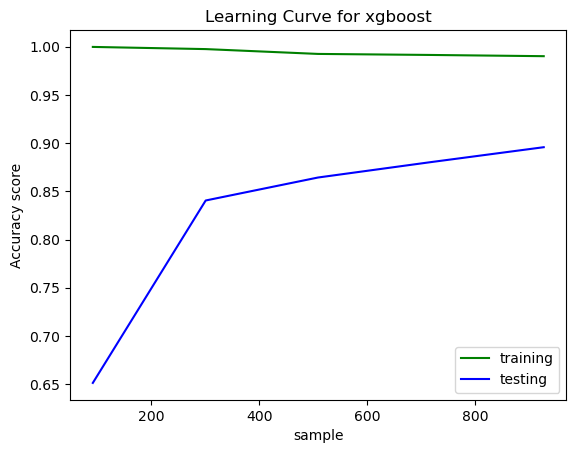

In [77]:
learningcurve('xgboost',XGBRegressor(),x,y)

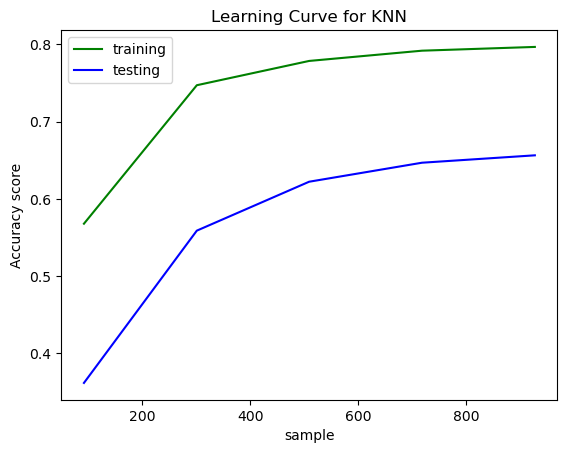

In [78]:
learningcurve('KNN',KNeighborsRegressor(),x,y)

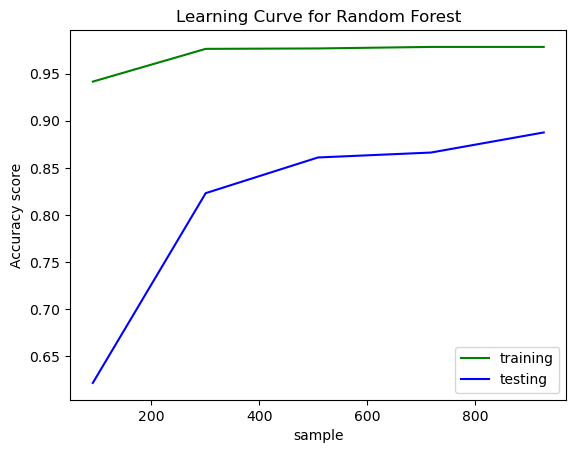

In [79]:
learningcurve('Random Forest',RandomForestRegressor(),x,y)

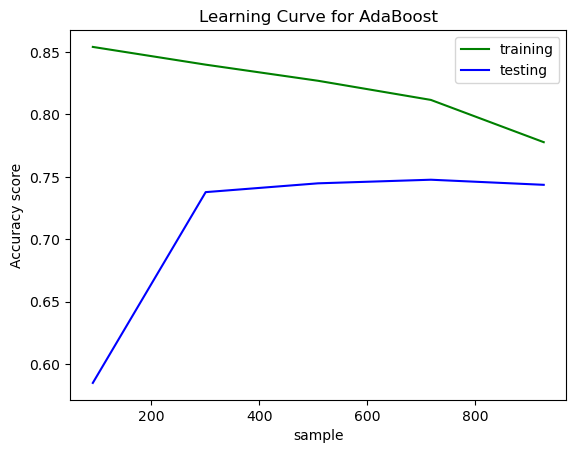

In [80]:
learningcurve('AdaBoost',AdaBoostRegressor(),x,y)